<a href="https://colab.research.google.com/github/Precious3ita/Top-spotify-listening/blob/main/finalproject_AILagos12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [2]:
df=pd.read_csv('/content/lagos_prepared_with_features (2).csv')

In [3]:

print(df.columns.tolist())

['uuid', 'City', 'Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor', 'Area_utilization_ratio', 'Energy_density', 'Capacity_density', 'System_efficiency', 'Energy_category']


In [4]:
df.dtypes

,0
uuid,object
City,object
Surface_area,float64
Potential_installable_area,float64
Peak_installable_capacity,float64
Energy_potential_per_year,float64
Assumed_building_type,object
Estimated_tilt,float64
Estimated_building_height,float64
Estimated_capacity_factor,float64


In [5]:
df.head(2)

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Area_utilization_ratio,Energy_density,Capacity_density,System_efficiency,Energy_category
0,2c2e6093-4675-4342-8141-78b7da7319f0,Lagos,174.4,103.42,20.06,26229.95,single family residential,13.33,5.05,1307.39,0.593005,253.625508,0.193966,0.149267,Medium
1,94e9aea9-4208-4a77-8578-100648bbca1a,Lagos,627.0,463.14,89.85,118061.12,multi-family residential,6.34,5.74,1314.00,0.738660,254.914540,0.194002,0.149998,High


In [6]:
missing = df.isnull().sum()
missing_percent = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({"Missing Count": missing, "Missing %": missing_percent})
display(missing_df[missing_df["Missing Count"] > 0])

,Missing Count,Missing %
Potential_installable_area,1,0.00
Peak_installable_capacity,1,0.00
Energy_potential_per_year,1,0.00
Assumed_building_type,1,0.00
Estimated_tilt,1,0.00
Estimated_building_height,1,0.00
Estimated_capacity_factor,1,0.00
Area_utilization_ratio,2,0.00
Energy_density,57,0.13
Capacity_density,57,0.13


In [7]:
dup_count = df.duplicated().sum()
#dup_count

print(f"\nNumber of duplicate rows: {dup_count}")



Number of duplicate rows: 0


In [8]:
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts().head(10))


Value counts for uuid:
uuid
a265a98f-342b-4cd4-abc9-7f4c7702d1c2    1
2c2e6093-4675-4342-8141-78b7da7319f0    1
94e9aea9-4208-4a77-8578-100648bbca1a    1
91841e20-5844-4aa5-9ba8-7c27b174ab4e    1
2818b582-c998-4c09-b473-e79de8caa898    1
32cfd9be-33f3-4761-a48a-a22077dcecc0    1
5bb9d9bd-e87d-4c5a-a525-8da768e8f06d    1
84158ab5-6ac5-4869-975e-51943d7d4038    1
1eed4e4f-1da0-40bb-924b-b1dddbba6011    1
4d3278f1-c2c8-4cb2-928d-73237a072b54    1
Name: count, dtype: int64

Value counts for City:
City
Lagos    43295
Name: count, dtype: int64

Value counts for Assumed_building_type:
Assumed_building_type
single family residential    19471
peri-urban settlement        16395
industrial                    3005
commercial                    2300
multi-family residential      1119
public                        1004
Name: count, dtype: int64

Value counts for Energy_category:
Energy_category
High      18214
Medium    12858
Low       12222
Name: count, dtype: int64


 Normalize column names

In [9]:
df.columns = (
    df.columns.str.strip()           # remove leading/trailing spaces
             .str.lower()            # lowercase
             .str.replace(' ', '_')  # replace spaces with underscores
)
print("\n Normalized column names:")
print(df.columns.tolist())



 Normalized column names:
['uuid', 'city', 'surface_area', 'potential_installable_area', 'peak_installable_capacity', 'energy_potential_per_year', 'assumed_building_type', 'estimated_tilt', 'estimated_building_height', 'estimated_capacity_factor', 'area_utilization_ratio', 'energy_density', 'capacity_density', 'system_efficiency', 'energy_category']


 Convert numeric columns to float

In [10]:
num_cols = [
    'surface_area',
    'potential_installable_area',
    'peak_installable_capacity',
    'energy_potential_per_year',
    'estimated_tilt',
    'estimated_building_height',
    'estimated_capacity_factor',
    'area_utilization_ratio',
    'energy_density',
    'capacity_density',
    'system_efficiency'
]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert invalid to NaN


In [11]:
cols_to_fill = ['area_utilization_ratio', 'energy_density', 'capacity_density', 'system_efficiency']
for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].median())

In [12]:
print(df.isnull().sum().sum(), "total missing values")

8 total missing values


In [13]:
df.shape

(43295, 15)

In [14]:
display(df.head(2))

,uuid,city,surface_area,potential_installable_area,peak_installable_capacity,energy_potential_per_year,assumed_building_type,estimated_tilt,estimated_building_height,estimated_capacity_factor,area_utilization_ratio,energy_density,capacity_density,system_efficiency,energy_category
0,2c2e6093-4675-4342-8141-78b7da7319f0,Lagos,174.4,103.42,20.06,26229.95,single family residential,13.33,5.05,1307.39,0.593005,253.625508,0.193966,0.149267,Medium
1,94e9aea9-4208-4a77-8578-100648bbca1a,Lagos,627.0,463.14,89.85,118061.12,multi-family residential,6.34,5.74,1314.00,0.738660,254.914540,0.194002,0.149998,High


In [15]:
# Save final cleaned dataset
df.to_csv("lagos_cleaned_final.csv", index=False)
print("Final cleaned dataset saved as 'lagos_cleaned_final.csv' (no warnings!)")

Final cleaned dataset saved as 'lagos_cleaned_final.csv' (no warnings!)


In [16]:
# Drop 'city' column before EDA

if 'city' in df.columns:
    df = df.drop(columns=['city'])
    print("'city' column removed successfully.")
else:
    print("'city' column not found — maybe it was already removed.")

print("Updated dataset shape:", df.shape)

# Save again for EDA
df.to_csv("lagos_cleaned_final.csv", index=False)


'city' column removed successfully.
Updated dataset shape: (43295, 14)


##EDA

In [17]:
# Load cleaned dataset
df = pd.read_csv("lagos_cleaned_final.csv")


In [18]:
# Set visual style
sns.set(style="whitegrid", palette="Set2")

In [19]:
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)


Dataset Shape: (43295, 14)

Columns:
 ['uuid', 'surface_area', 'potential_installable_area', 'peak_installable_capacity', 'energy_potential_per_year', 'assumed_building_type', 'estimated_tilt', 'estimated_building_height', 'estimated_capacity_factor', 'area_utilization_ratio', 'energy_density', 'capacity_density', 'system_efficiency', 'energy_category']

Data Types:
 uuid                           object
surface_area                  float64
potential_installable_area    float64
peak_installable_capacity     float64
energy_potential_per_year     float64
assumed_building_type          object
estimated_tilt                float64
estimated_building_height     float64
estimated_capacity_factor     float64
area_utilization_ratio        float64
energy_density                float64
capacity_density              float64
system_efficiency             float64
energy_category                object
dtype: object


<Figure size 1400x1000 with 0 Axes>

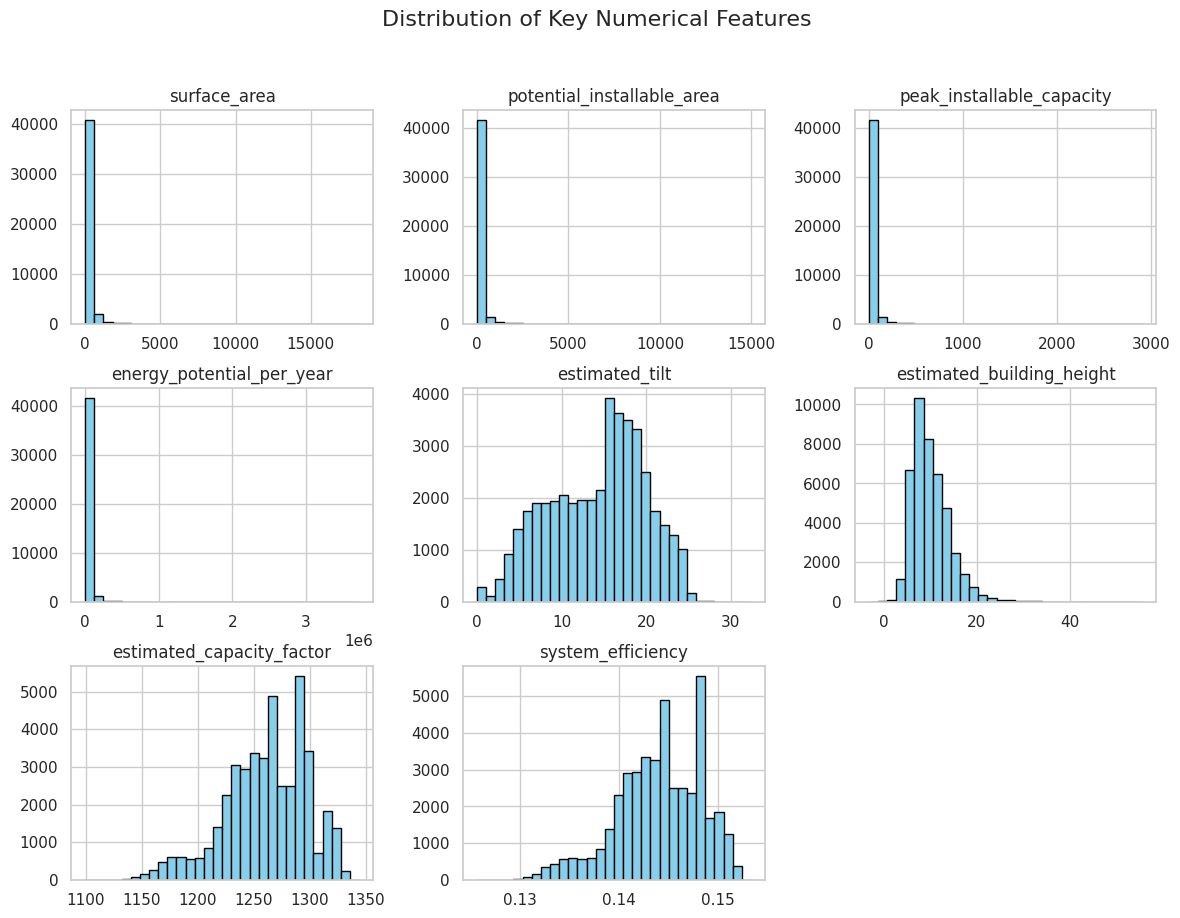

In [20]:
# Basic Distribution Plots for Key Numerical Columns ===
num_features = [
    'surface_area', 'potential_installable_area', 'peak_installable_capacity',
    'energy_potential_per_year', 'estimated_tilt', 'estimated_building_height',
    'estimated_capacity_factor', 'system_efficiency'
]

plt.figure(figsize=(14, 10))
df[num_features].hist(bins=30, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Key Numerical Features", fontsize=16)
plt.show()

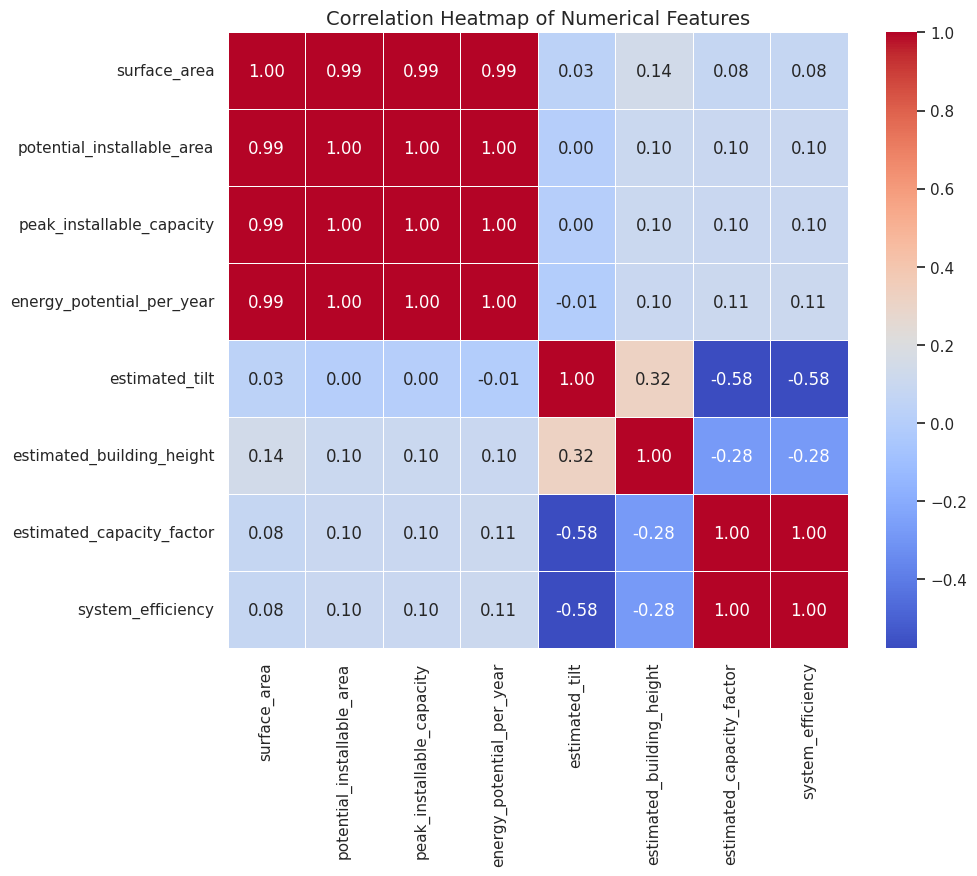

In [21]:
 #Correlation Heatmap ===
plt.figure(figsize=(10, 8))
corr = df[num_features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

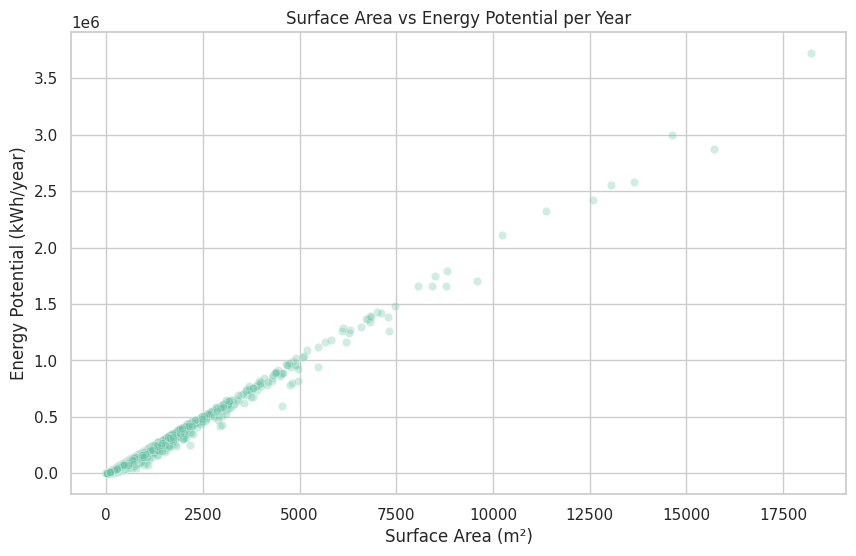

In [22]:
# Relationships with Target (Regression Target: energy_potential_per_year) ===
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='surface_area', y='energy_potential_per_year', alpha=0.3)
plt.title("Surface Area vs Energy Potential per Year")
plt.xlabel("Surface Area (m²)")
plt.ylabel("Energy Potential (kWh/year)")
plt.show()


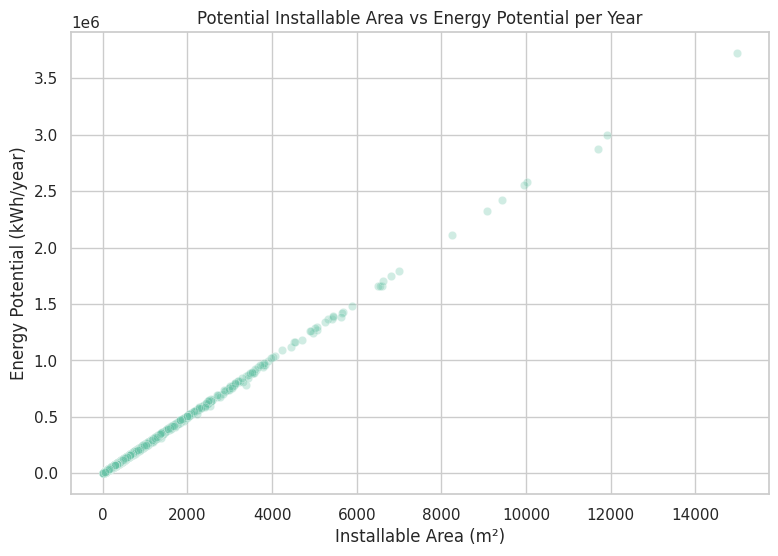

In [23]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x='potential_installable_area', y='energy_potential_per_year', alpha=0.3)
plt.title("Potential Installable Area vs Energy Potential per Year")
plt.xlabel("Installable Area (m²)")
plt.ylabel("Energy Potential (kWh/year)")
plt.show()

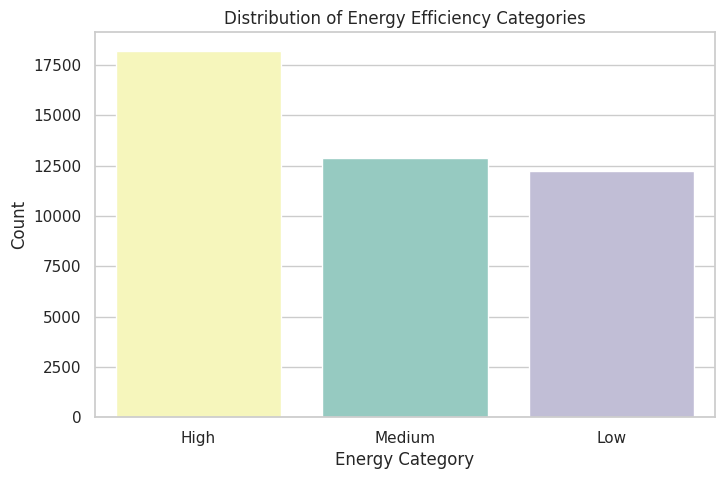

In [24]:
#Categorical Analysis (Classification Target: energy_category) ===
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='energy_category',
    hue='energy_category',    # added hue for color mapping
    palette="Set3",
    order=df['energy_category'].value_counts().index,
    legend=False              # hides duplicate legend
)

plt.title("Distribution of Energy Efficiency Categories")
plt.xlabel("Energy Category")
plt.ylabel("Count")
plt.show()

 **Feature Engineering**


New engineered features added successfully

       area_utilization_ratio  energy_density  capacity_density  \
count            43295.000000    43295.000000      43295.000000   
mean                 0.617477      244.805725          0.194002   
std                  0.108749        7.193061          0.000121   
min                  0.000000      213.285714          0.191617   
25%                  0.555447      240.214321          0.193977   
50%                  0.619313      245.609073          0.194000   
75%                  0.714546      250.980474          0.194024   
max                  0.821976      260.693506          0.196078   

       system_efficiency  
count       43295.000000  
mean            0.144050  
std             0.004233  
min             0.125640  
25%             0.141349  
50%             0.144528  
75%             0.147786  
max             0.153340  


<Figure size 1400x800 with 0 Axes>

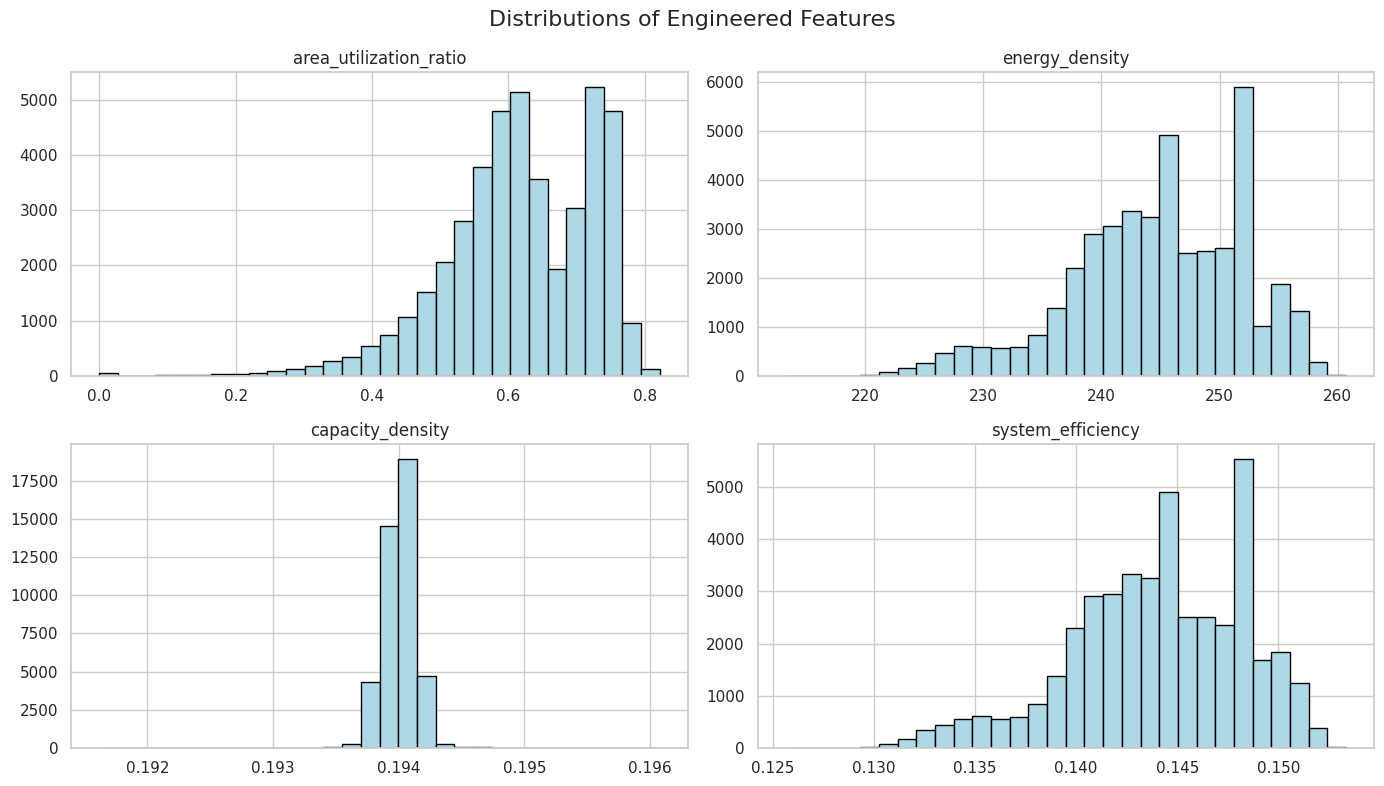


File saved as 'lagos_with_engineered_features.csv'


In [25]:
# Create engineered features

# 1. Area Utilization Ratio
df['area_utilization_ratio'] = df['potential_installable_area'] / df['surface_area']

# 2. Energy Density (kWh per m²)
df['energy_density'] = df['energy_potential_per_year'] / df['potential_installable_area']

# 3. Capacity Density (kW per m²)
df['capacity_density'] = df['peak_installable_capacity'] / df['potential_installable_area']

# 4. System Efficiency
df['system_efficiency'] = df['energy_potential_per_year'] / (df['peak_installable_capacity'] * 8760)

# Handle infinities or division errors (if any) ===
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

# Quick check of new features ===
print("\nNew engineered features added successfully\n")
print(df[['area_utilization_ratio', 'energy_density', 'capacity_density', 'system_efficiency']].describe())

# Visualize distributions of new features ===
plt.figure(figsize=(14, 8))
df[['area_utilization_ratio', 'energy_density', 'capacity_density', 'system_efficiency']].hist(
    bins=30, figsize=(14, 8), color='lightblue', edgecolor='black'
)
plt.suptitle("Distributions of Engineered Features", fontsize=16)
plt.tight_layout()
plt.show()

#Save the dataset with engineered features ===
df.to_csv("lagos_with_engineered_features.csv", index=False)
print("\nFile saved as 'lagos_with_engineered_features.csv'")


**Checking for Multicollinearity**

In [26]:
# Multicollinearity Check using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric feature columns
X_vif = df[[
    'surface_area', 'potential_installable_area', 'peak_installable_capacity',
    'estimated_tilt', 'estimated_building_height', 'estimated_capacity_factor',
    'area_utilization_ratio', 'energy_density', 'capacity_density', 'system_efficiency'
]]

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(" Variance Inflation Factor (VIF) for Each Feature:")
display(vif_data.sort_values(by="VIF", ascending=False))


 Variance Inflation Factor (VIF) for Each Feature:


,Feature,VIF
9,system_efficiency,3.487212e+06
7,energy_density,3.486935e+06
2,peak_installable_capacity,3.429639e+06
1,potential_installable_area,3.428968e+06
5,estimated_capacity_factor,1.163584e+06
8,capacity_density,2.104799e+03
0,surface_area,2.020486e+02
6,area_utilization_ratio,4.988578e+01
3,estimated_tilt,1.262461e+01
4,estimated_building_height,8.833598e+00


In [27]:
#Drop highly correlated features (based on your VIF analysis) ===
final_features = [
    'surface_area',
    'estimated_tilt',
    'estimated_building_height',
    'system_efficiency'
]

X = df[final_features]
y = df['energy_potential_per_year']

print("Features selected for final modeling:\n", final_features)

Features selected for final modeling:
 ['surface_area', 'estimated_tilt', 'estimated_building_height', 'system_efficiency']


In [28]:
# Check new VIF values to confirm multicollinearity is resolved ===
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (after dropping):")
display(vif_df.sort_values(by="VIF", ascending=False))


Variance Inflation Factors (after dropping):


,Feature,VIF
3,system_efficiency,9.622560
1,estimated_tilt,7.808523
2,estimated_building_height,7.769956
0,surface_area,1.647571


**Regression Modeling**

In [29]:
#  Define features (X) and target (y)
target = 'energy_potential_per_year'

In [30]:
# let use both original and engineered numeric features
features = [
    'surface_area', 'potential_installable_area', 'peak_installable_capacity',
    'estimated_tilt', 'estimated_building_height', 'estimated_capacity_factor',
    'area_utilization_ratio', 'energy_density', 'capacity_density', 'system_efficiency'
]

X = df[features]
y = df[target]


In [31]:
#Split into training and testing sets ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set:", X_train.shape, "Test set:", X_test.shape)


Training set: (34636, 10) Test set: (8659, 10)


In [32]:
 # Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0)
}

results = []

In [34]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])
    print(f"\n📈 {name} Results:")
    print(f"MAE: {mae:,.2f}")
    print(f"RMSE: {rmse:,.2f}")
    print(f"R²: {r2:.4f}")

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
display(results_df)



📈 Linear Regression Results:
MAE: 748.40
RMSE: 1,356.26
R²: 0.9996

📈 Ridge Regression Results:
MAE: 742.27
RMSE: 1,329.87
R²: 0.9996


,Model,MAE,RMSE,R²
0,Linear Regression,748.402344,1356.262331,0.999591
1,Ridge Regression,742.267871,1329.868855,0.999607


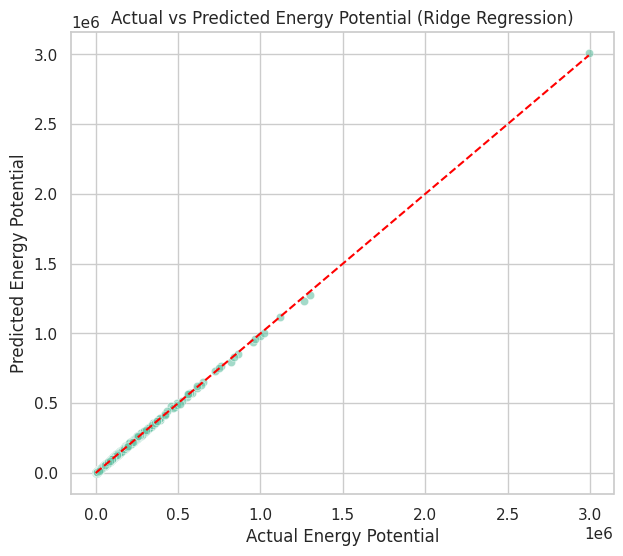

In [35]:
# Plot Actual vs Predicted (Ridge)
plt.figure(figsize=(7,6))
y_pred_ridge = models["Ridge Regression"].predict(X_test_scaled)
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Energy Potential (Ridge Regression)")
plt.xlabel("Actual Energy Potential")
plt.ylabel("Predicted Energy Potential")
plt.show()


**Linear classification.**

In [36]:
# Features and target
X_class = df[['surface_area', 'estimated_tilt', 'estimated_building_height', 'system_efficiency']]
y_class = df['energy_category']

In [52]:
#  Define features and target
X_class = df[['surface_area', 'estimated_tilt', 'estimated_building_height', 'system_efficiency']]
y_class = df['energy_category']

#  Fix alignment, remove NaNs, and confirm matching lengths
X_class = X_class.reset_index(drop=True)
y_class = y_class.reset_index(drop=True)

combined = pd.concat([X_class, y_class], axis=1).dropna()

X_class = combined[['surface_area', 'estimated_tilt', 'estimated_building_height', 'system_efficiency']]
y_class = combined['energy_category']

print("X_class shape:", X_class.shape)
print("y_class shape:", y_class.shape)


X_class shape: (43294, 4)
y_class shape: (43294,)


In [53]:
# Encode target labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)

# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class_encoded, test_size=0.2, random_state=42, stratify=y_class_encoded
)

print("Training samples:", X_train_c.shape[0])
print("Testing samples:", X_test_c.shape[0])


Training samples: 34635
Testing samples: 8659


In [54]:
# Scale the features
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)


In [55]:
print("Classification data ready!")
print(f"Training samples: {X_train_c.shape[0]}")
print(f"Testing samples: {X_test_c.shape[0]}")
print(f"Classes: {list(le.classes_)}")

Classification data ready!
Training samples: 34635
Testing samples: 8659
Classes: ['High', 'Low', 'Medium']


Classification Models

In [56]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_c_scaled, y_train_c)
y_pred_log = log_model.predict(X_test_c_scaled)

In [50]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_c, y_train_c)
y_pred_rf = rf_model.predict(X_test_c)


In [57]:
# Evaluation
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test_c, y_pred_log):.4f}")
print(classification_report(y_test_c, y_pred_log, target_names=le.classes_))

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test_c, y_pred_rf):.4f}")
print(classification_report(y_test_c, y_pred_rf, target_names=le.classes_))


Logistic Regression Results:
Accuracy: 0.9300
              precision    recall  f1-score   support

        High       0.95      0.95      0.95      3643
         Low       0.95      0.95      0.95      2444
      Medium       0.88      0.88      0.88      2572

    accuracy                           0.93      8659
   macro avg       0.93      0.93      0.93      8659
weighted avg       0.93      0.93      0.93      8659


Random Forest Results:
Accuracy: 0.9317
              precision    recall  f1-score   support

        High       0.94      0.96      0.95      3643
         Low       0.97      0.93      0.95      2444
      Medium       0.88      0.89      0.89      2572

    accuracy                           0.93      8659
   macro avg       0.93      0.93      0.93      8659
weighted avg       0.93      0.93      0.93      8659



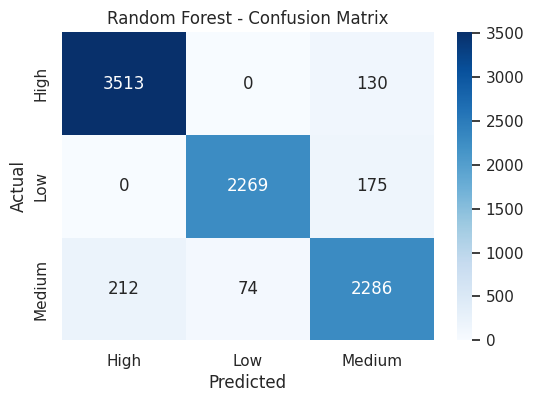

In [58]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_c, y_pred_rf),
            annot=True, cmap='Blues', fmt='g',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Hyperparameter Tuning for Random Forest.

In [59]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)


In [ ]:
# Grid Search with 3-fold Cross Validation
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                  #         cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

#grid_search.fit(X_train_c, y_train_c)


RandomizedSearchCV for Faster Tuning.

In [60]:
# Parameter grid (same as before)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)


In [61]:
# Randomized Search (test only 20 random combinations)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,              # try only 20 random parameter sets
    cv=3,                   # 3-fold cross-validation
     n_jobs=-1,              # use all available CPU cores
    verbose=2,              # print progress
    random_state=42,
    scoring='accuracy'      # measure accuracy
)

# Fit on training data
random_search.fit(X_train_c, y_train_c)

# Get best model
best_rf = random_search.best_estimator_

print("\n Best Parameters for Random Forest (Randomized Search):")
print(random_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits

 Best Parameters for Random Forest (Randomized Search):
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}


In [62]:
# Evaluate the tuned model
y_pred_best = best_rf.predict(X_test_c)
print("\n  Tuned Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test_c, y_pred_best):.4f}")
print(classification_report(y_test_c, y_pred_best, target_names=le.classes_))



  Tuned Random Forest Results:
Accuracy: 0.9372
              precision    recall  f1-score   support

        High       0.94      0.97      0.96      3643
         Low       0.98      0.92      0.95      2444
      Medium       0.89      0.90      0.89      2572

    accuracy                           0.94      8659
   macro avg       0.94      0.93      0.93      8659
weighted avg       0.94      0.94      0.94      8659



feature importance visualization

In [63]:
# Extract feature importances
importances = best_rf.feature_importances_
feature_names = X_train_c.columns

# Put them in a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


In [64]:
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


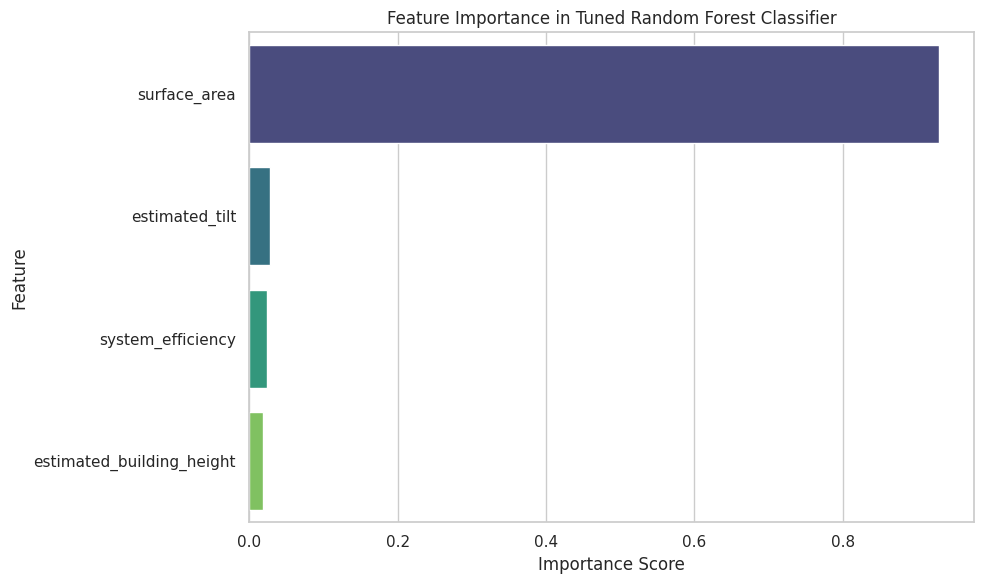

,Feature,Importance
0,surface_area,0.930396
1,estimated_tilt,0.027570
3,system_efficiency,0.023440
2,estimated_building_height,0.018594


In [65]:
# Plot the feature importances
plt.figure(figsize=(10,6))
sns.barplot(data=importance_df, x='Importance', y='Feature', hue='Feature', legend=False, palette='viridis')
plt.title('Feature Importance in Tuned Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

importance_df.head(10)

<Figure size 600x500 with 0 Axes>

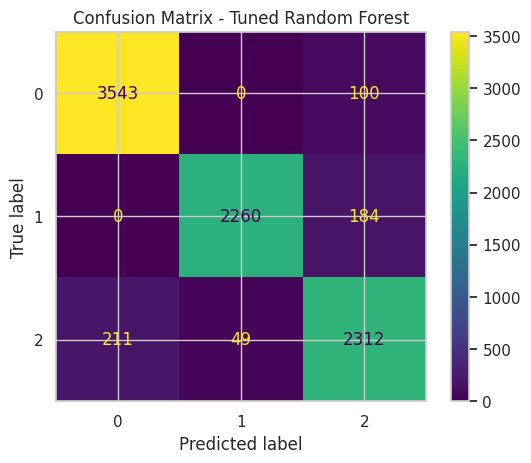

In [66]:
# Predict the classes
y_pred_best = best_rf.predict(X_test_c)

# Compute confusion matrix
cm = confusion_matrix(y_test_c, y_pred_best, labels=best_rf.classes_)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
plt.figure(figsize=(6, 5))
disp.plot(cmap='viridis', values_format='d')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()


ROC Curve (Multi-class).

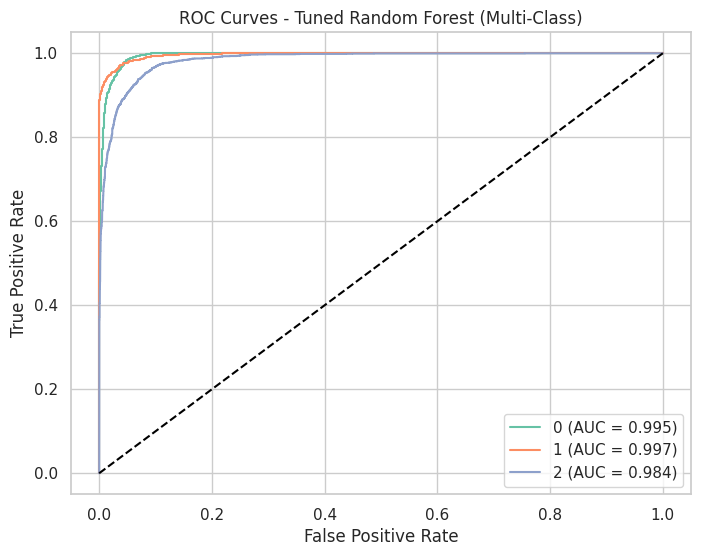

In [67]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Binarize the output (for multiclass ROC)
y_test_bin = label_binarize(y_test_c, classes=best_rf.classes_)
y_score = best_rf.predict_proba(X_test_c)

plt.figure(figsize=(8, 6))
for i, class_label in enumerate(best_rf.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {auc(fpr, tpr):.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves - Tuned Random Forest (Multi-Class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


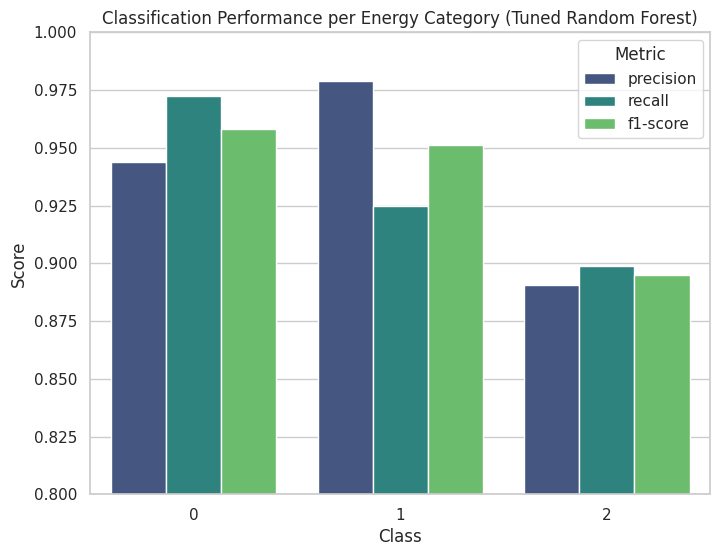

In [68]:
# Get classification report as a dictionary
report = classification_report(y_test_c, best_rf.predict(X_test_c), output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose().iloc[:-3, :]  # remove avg/total rows

# Reset index for plotting
report_df.reset_index(inplace=True)
report_df.rename(columns={'index': 'Class'}, inplace=True)

# Melt for visualization
report_melted = report_df.melt(id_vars='Class', value_vars=['precision', 'recall', 'f1-score'],
                               var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=report_melted, x='Class', y='Score', hue='Metric', palette='viridis')
plt.title("Classification Performance per Energy Category (Tuned Random Forest)")
plt.ylim(0.8, 1.0)
plt.legend(title='Metric')
plt.show()


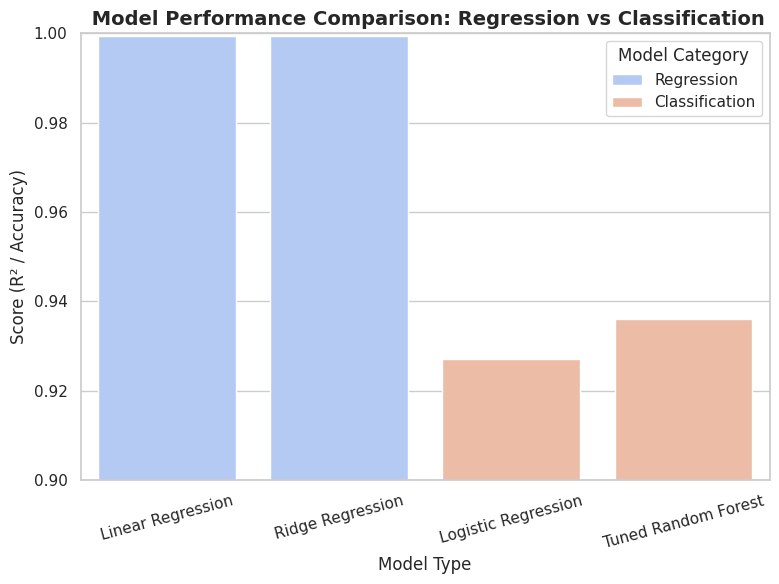

In [70]:
# Regression results
regression_data = {
    'Model': ['Linear Regression', 'Ridge Regression'],
    'Metric': ['R²', 'R²'],
    'Score': [0.9993, 0.9993]
}

# Classification results
classification_data = {
    'Model': ['Logistic Regression', 'Tuned Random Forest'],
    'Metric': ['Accuracy', 'Accuracy'],
    'Score': [0.927, 0.936]
}

# Combine into one DataFrame
results_df = pd.concat([
    pd.DataFrame(regression_data),
    pd.DataFrame(classification_data)
])

# Add model type
results_df['Type'] = ['Regression', 'Regression', 'Classification', 'Classification']

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=results_df, x='Model', y='Score', hue='Type', palette='coolwarm')
plt.title(" Model Performance Comparison: Regression vs Classification", fontsize=14, fontweight='bold')
plt.ylim(0.9, 1.0)
plt.ylabel("Score (R² / Accuracy)")
plt.xlabel("Model Type")
plt.xticks(rotation=15)
plt.legend(title='Model Category')
plt.tight_layout()
plt.show()


In [73]:
import joblib
joblib.dump(best_rf, "best_rf.pkl")
joblib.dump(Ridge, "ridge_best.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [75]:
joblib.dump(best_rf, "best_rf.pkl")   # Tuned Random Forest model
joblib.dump(Ridge, "ridge_best.pkl")  # Tuned Ridge regression model
joblib.dump(scaler, "scaler.pkl")     # Data scaler


['scaler.pkl']

In [76]:
import os

print(os.listdir())


['.config', 'drive', 'best_rf.pkl', 'scaler.pkl', 'lagos_prepared_with_features (2).csv', 'lagos_with_engineered_features.csv', 'ridge_best.pkl', 'lagos_cleaned_final.csv', 'sample_data']
